In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #need to plot the tree#
# from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
# from sklearn.neighbors import KNeighborsClassifier
# sklearn. neighbors provides functionality for unsupervised and supervised neighbors-based learning methods#
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets

In [44]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) #importing dataset and making dataframe - add column names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
X = df.drop('class', axis=1)
y = df['class']

In [47]:
df["class"].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [48]:
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [49]:
# dt = tree.DecisionTreeClassifier() #default criterion is gini
dt = tree.DecisionTreeClassifier(criterion = "entropy")

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)[source]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [51]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.494\nsamples = 37\nvalue = [0, 33, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[1] <= 2.45\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\nentropy = 0.176\nsam

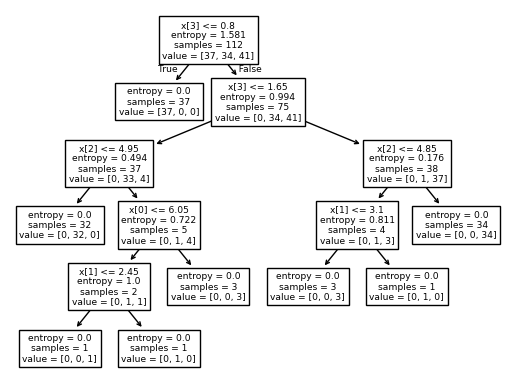

In [52]:
tree.plot_tree(dt)

In [53]:
pred = dt.predict(X_test)

In [54]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# **Visualizing a Decision Tree**

In [55]:
import graphviz

In [56]:
decision_tree = tree.export_graphviz(dt,out_file='tree.dot',feature_names=X_train.columns,class_names=['setosa', 'versicolor', 'virginica'],max_depth=6,filled=True)

**Convert dot file to png**

In [57]:
!dot -Tpng tree.dot -o tree.png

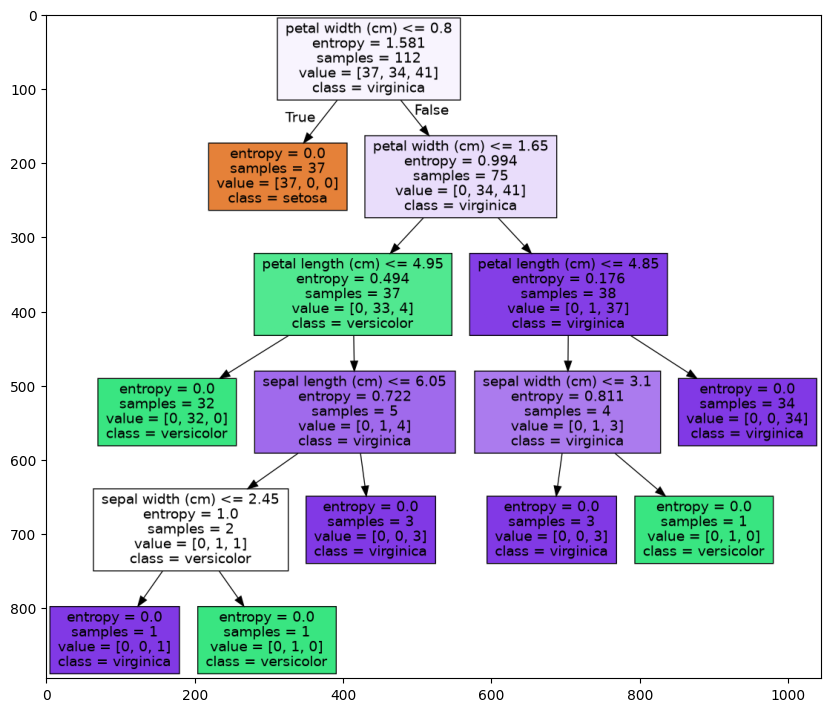

In [58]:
image = plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

# Online source about Implementing a Decision Tree from Scratch:
 https://www.kaggle.com/code/fareselmenshawii/decision-tree-from-scratch

# **Cross Validation on the Decision Tree Model**
1. Hold-out cross-validation
2. K-fold cross-validation
3. Stratified k-fold cross-validation
4. Leave-p-out cross-validation

# 1. Hold-out cross-validation

<img src='https://images.prismic.io/turing/65a532e47a5e8b1120d58771_image4_11zon_349fe18723.webp?auto=format,compress.png' width=500/>

# 2. K-fold Cross Validation
NOT suitable for imbalanced datasets

<img src='https://images.prismic.io/turing/6598098d531ac2845a272519_image5_11zon_af97fe4b03.webp?auto=format,compress' width=500/>


In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [60]:
scores.mean()

np.float64(0.9600000000000002)

Advantages and Drawbacks of k-fold method:

Advantages:

The best part about this method is each data point gets to be in the test set exactly once and gets to be part of the training set k-1 times. As the number of folds k increases, the variance also decreases (low variance).

Drawbacks:

The major disadvantage of this method is that the model has to be run from scratch k-times and is computationally expensive than the Hold Out method.

# 3. Stratified K-fold Cross Validation
<img src= 'https://images.prismic.io/turing/65a532e87a5e8b1120d58778_image1_11zon_10bb3bd085.webp?auto=format,compress' width = 500/>

In [61]:
from sklearn.model_selection import StratifiedKFold
scores1 = cross_val_score(dt, X, y, cv=StratifiedKFold())
print(scores1)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [62]:
scores1.mean()

np.float64(0.9533333333333334)

# 4. Leave-p-out cross-validation
p samples are used as the validation set and n-p samples are used as the training set if a dataset has n samples

*** Leave one out Cross Validation (LOOCV)***

<img src = "https://images.prismic.io/turing/65a532ed7a5e8b1120d5877e_image2_11zon_cac3fb4270.webp?auto=format,compress" width=500/>

In [63]:
from sklearn.model_selection import LeaveOneOut
# loocv = LeaveOneOut()
scores2 = cross_val_score(dt, X, y, cv=LeaveOneOut())
print(scores2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [64]:
scores2.mean()*100

np.float64(95.33333333333334)

Advantages and Drawbacks of Leave one Out method:

Advantages:

This method helps to reduce Bias and Randomness.

Drawbacks:

LOOCV has an extremely high variance because we are averaging the output of n-models which are fitted on an almost identical set of observations, and their outputs are highly positively correlated with each other.Also this is computationally expensive as the model is run ‘n’ times to test every observation in the data.

# **Hyperparameter Tuning**

**Using Grid Search**

See the parameters of Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [65]:
from sklearn.model_selection import GridSearchCV

criteria = ["gini", "entropy"]      #criteria to be tested
min_sample_split_range = [2,10, 20] #min sample split to be tested
max_depth_range = [None, 2, 5, 10]  #max depth to be tested
min_samples_leaf_range = [1, 5, 10] #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10, 20]    #min leaf nodes to be tested

param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": min_leaf_nodes_range
                }

grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(),
                    param_grid=param_grid,
                    cv = 5,
                    scoring='accuracy',
                    refit=True, #setting grid with estimator
                    verbose=1)

grid.fit(X_train, y_train)

# score_df = pd.DataFrame(grid.cv_results_)
# score_df.head()

# OR just print the final results
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy of the tuned model: 0.9644
{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}




```
# This is formatted as code
```

**Using Randomized Search**

# **Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(n_estimators=100)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
pred2 = rfc.predict(X_test)

In [70]:
print(confusion_matrix(y_test,pred2))
print('\n')
print(classification_report(y_test,pred2))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# **Perform Different types of Hyperparameter Tuning and Cross Validation on the Random Forest Classfied Model**
See below 5 exercises for 2 bonus point each. Total 5*2 = 10.
---



**Apply K-Fold CV **

In [71]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(rfc, X, y, cv=kf)

print("K-fold cross-validation scores:", kf_scores)
print("Average cross-validation score:", kf_scores.mean())

K-fold cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average cross-validation score: 0.9600000000000002


**Apply Stratified K-fold CV**

In [72]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(rfc, X, y, cv=skf, scoring='accuracy')

print("Stratified KFold score: ", skf_scores)
print("Average Stratified KFold score: ", skf_scores.mean())

Stratified KFold score:  [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Average Stratified KFold score:  0.9533333333333335


**Apply LOOCV**

In [73]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, LeavePOut

loo = LeaveOneOut()
loo_scores = cross_val_score(rfc, X, y, cv=loo, scoring='accuracy')

print("Leave One Out scores: ", loo_scores)
print("Average Leave One Out Cross Validation Score: ", loo_scores.mean())

lpo = LeavePOut(p=2)
# setting n_jobs=-1 to use all cores and speed up the process
lpo_scores = cross_val_score(rfc, X, y, cv=lpo, scoring='accuracy', n_jobs=-1)

print("Leave P Out scores: ", lpo_scores)
print("Average Leave P Out Cross Validation Score: ", lpo_scores.mean())

Leave One Out scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Leave One Out Cross Validation Score:  0.9533333333333334
Leave P Out scores:  [1. 1. 1. ... 1. 1. 1.]
Average Leave P Out Cross Validation Score:  0.9539597315436241


**Apply Grid Search Hyper Parameter Tuning**

In [74]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'n_estimators': [5, 10, 15, 50],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

grid_search_cv = GridSearchCV(estimator=rfc, param_grid=parameter_grid, cv=5, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

print("Best parameters:", grid_search_cv.best_params_)
print("Best score:", grid_search_cv.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9644268774703558


/home/acharyp/Projects/ml-projects/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Apply Randomized Hyperparameter Tuning**

In [77]:
from sklearn.model_selection import RandomizedSearchCV

parameter_grid = {
    'n_estimators': [5, 10, 15, 50],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

random_search_cv = RandomizedSearchCV(estimator=rfc, param_distributions=parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)
random_search_cv.fit(X_train, y_train)

print("Best parameters:", random_search_cv.best_params_)
print("Best score:", random_search_cv.best_score_)

Best parameters: {'n_estimators': 15, 'min_samples_split': 2, 'max_depth': 7, 'criterion': 'entropy'}
Best score: 0.9462450592885375


/home/acharyp/Projects/ml-projects/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
